In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

In [ ]:
#Generate sample data
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [ ]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Create and train the model
model = SVC(kernel='rbf', C=1.0, random_state=42)
model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
#Make Prediction
y_pred = model.predict(X_test_scaled)

In [ ]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



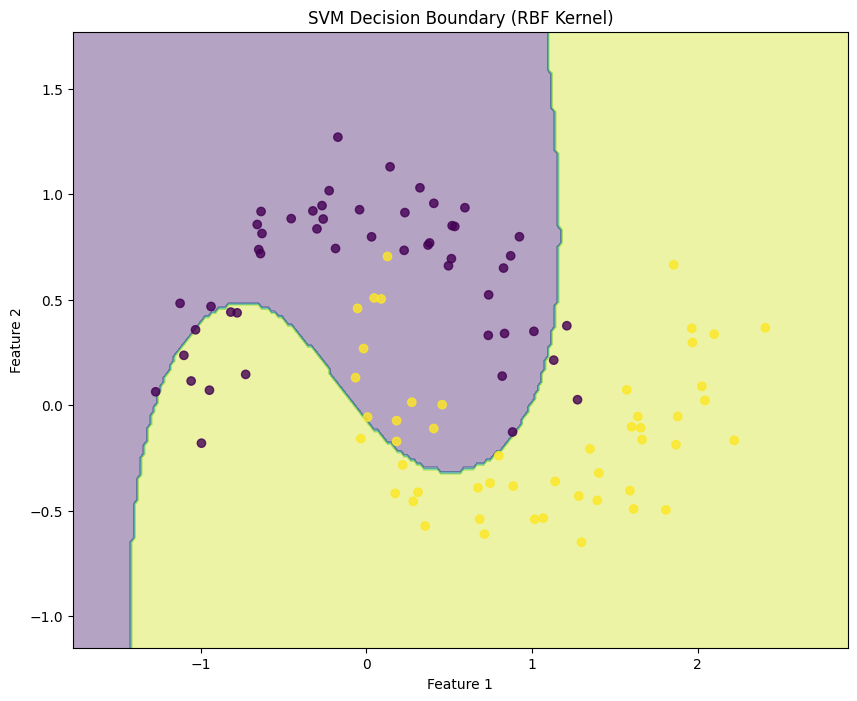

In [ ]:
#plot decision boundary
def plot_decision_boundary(X, y, model, ax=None):
  ax = ax or plt.gca()

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))
  z= model.predict(np.c_[xx.ravel(), yy.ravel()])
  z = z.reshape(xx.shape)

  ax.contourf(xx, yy, z, alpha=0.4)
  ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
  ax.set_xlabel('Feature 1')
  ax.set_ylabel('Feature 2')
  return ax

plt.figure(figsize=(10, 8))
plot_decision_boundary(X, y, model)
plt.title('SVM Decision Boundary (RBF Kernel)')
plt.show()